### Load data
### Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

### Load Data

In [2]:
train_data = pd.read_csv("../../data/train.csv")
test_data = pd.read_csv("../../data/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Exploratory Data Analysis

In [5]:
train_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


The 'Cabin' column has a lot of Nan values, so we won't be using it as a feature.


In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Dropping the cabin ane Name column
train_df = train_data.drop(['Cabin', 'Name'], axis = 1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [9]:
# Set index to PassengerID
train_df.set_index(['PassengerId'], inplace = True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


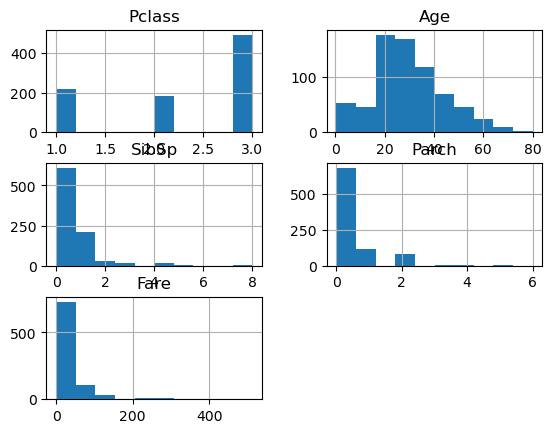

In [10]:
# View distribution
import matplotlib.pyplot as plt
viz = train_df[['Pclass','Age','SibSp','Parch', 'Fare']]
viz.hist()
plt.show()

In [11]:
# Peplace rows with missing age values with median
#'S' is the most common element in the 'Embarked' column, we'll replace missing values in that column with 'S'
 
train_df['Age'] = train_df['Age'].replace(np.nan, train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].replace(np.nan, 'S')

In [12]:
train_df.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,7,NaN,646
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


We have 891 entries which we will use for training.
<p>We'll select our features

#### One-hot encoding the 'Sex' and 'Embarked' columns

In [14]:
train_onehot = pd.get_dummies(train_df[['Sex', 'Embarked']], prefix="", prefix_sep="")
train_onehot.head()

,female,male,C,Q,S
PassengerId,,,,,
1,False,True,False,False,True
2,True,False,True,False,False
3,True,False,False,False,True
4,True,False,False,False,True
5,False,True,False,False,True


In [15]:
# New train dataframe
new_train_df = pd.merge(left = train_df, right = train_onehot, left_index=True, right_on='PassengerId')
new_train_df.drop('Sex', axis = 1, inplace = True)
new_train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
PassengerId,,,,,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,S,False,True,False,False,True
2,1,1,38.0,1,0,PC 17599,71.2833,C,True,False,True,False,False
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,True,False,False,False,True
4,1,1,35.0,1,0,113803,53.1000,S,True,False,False,False,True
5,0,3,35.0,0,0,373450,8.0500,S,False,True,False,False,True


Replace column names

In [16]:
# Rename columns
new_train_df = new_train_df.rename(columns = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
new_train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,S,False,True,False,False,True
2,1,1,38.0,1,0,PC 17599,71.2833,C,True,False,True,False,False
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,True,False,False,False,True
4,1,1,35.0,1,0,113803,53.1000,S,True,False,False,False,True
5,0,3,35.0,0,0,373450,8.0500,S,False,True,False,False,True


In [17]:
# Selecting features
features = ["Pclass", "Age", "SibSp", "Parch", "female", "male", "Cherbourg", "Queenstown", "Southampton"]
X_train = new_train_df[features]
y_train = new_train_df['Survived']

In [18]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
standard_scale = StandardScaler()
scaled_feature = standard_scale.fit_transform(X_train)
scaled_feature
X_train = pd.DataFrame(scaled_feature, columns = features)
X_train

,Pclass,Age,SibSp,Parch,female,male,Cherbourg,Queenstown,Southampton
0,0.827377,-0.565736,0.432793,-0.473674,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.663861,0.432793,-0.473674,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.258337,-0.474545,-0.473674,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.433312,0.432793,-0.473674,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.433312,-0.474545,-0.473674,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.796286,-0.474545,-0.473674,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.104637,0.432793,2.008933,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.737695,0.737695,2.074505,-0.307562,-1.623803


### TEST DATA

In [19]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
### The age column has Nan values
test_data[test_data['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
test_data = test_data.replace(np.nan, train_df['Age'].median())

In [ ]:
test_onehot = pd.get_dummies(test_data[['Sex', 'Embarked']], prefix="", prefix_sep="")
test_onehot.head()

,female,male,C,Q,S
0,False,True,False,True,False
1,True,False,False,False,True
2,False,True,False,True,False
3,False,True,False,False,True
4,True,False,False,False,True


In [25]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,28.0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,28.0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,28.0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,28.0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,28.0,S


In [26]:
# New test dataframe
new_test_df = pd.merge(left = test_data, right = test_onehot, left_index=True, right_on=test_data.index)
new_test_df.drop('Sex', axis = 1, inplace = True)
new_test_df.head()

,key_0,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,28.0,Q,False,True,False,True,False
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,28.0,S,True,False,False,False,True
2,2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,28.0,Q,False,True,False,True,False
3,3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,28.0,S,False,True,False,False,True
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,28.0,S,True,False,False,False,True


In [27]:
new_test_df.drop(columns = ['key_0'], axis=1, inplace=True)
new_test_df.head(5)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,28.0,Q,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,28.0,S,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,28.0,Q,False,True,False,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,28.0,S,False,True,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,28.0,S,True,False,False,False,True


In [28]:
# Rename columns
new_test_df.rename(columns = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}, inplace = True)
new_test_df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Cherbourg,Queenstown,Southampton
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,28.0,Q,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,28.0,S,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,28.0,Q,False,True,False,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,28.0,S,False,True,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,28.0,S,True,False,False,False,True


In [29]:
new_test_df.set_index('PassengerId', inplace = True)
new_test_df.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,28.0,Q,False,True,False,True,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,28.0,S,True,False,False,False,True
894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,28.0,Q,False,True,False,True,False
895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,28.0,S,False,True,False,False,True
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,28.0,S,True,False,False,False,True


In [30]:
X_test = new_test_df[features]
X_test.shape

(418, 9)

In [31]:
X_test

,Pclass,Age,SibSp,Parch,female,male,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,
892,3,34.5,0,0,False,True,False,True,False
893,3,47.0,1,0,True,False,False,False,True
894,2,62.0,0,0,False,True,False,True,False
895,3,27.0,0,0,False,True,False,False,True
896,3,22.0,1,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...
1305,3,28.0,0,0,False,True,False,False,True
1306,1,39.0,0,0,True,False,True,False,False
1307,3,38.5,0,0,False,True,False,False,True


In [32]:
scaled_test_features = standard_scale.transform(X_test)
X_test_scaled = pd.DataFrame(scaled_test_features, columns=features)

In [33]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    float64
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    float64
 3   Parch        418 non-null    float64
 4   female       418 non-null    float64
 5   male         418 non-null    float64
 6   Cherbourg    418 non-null    float64
 7   Queenstown   418 non-null    float64
 8   Southampton  418 non-null    float64
dtypes: float64(9)
memory usage: 29.5 KB


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [35]:
import pickle

In [36]:
filename = 'titanic_model.pkl'

with open(filename, 'wb') as file:  
    pickle.dump(LR, file)

In [37]:
X_test.dropna(axis = 0, inplace = True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   female       418 non-null    bool   
 5   male         418 non-null    bool   
 6   Cherbourg    418 non-null    bool   
 7   Queenstown   418 non-null    bool   
 8   Southampton  418 non-null    bool   
dtypes: bool(5), float64(1), int64(3)
memory usage: 18.4 KB


C:\Users\Owner\AppData\Local\Temp\ipykernel_21844\3739806058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.dropna(axis = 0, inplace = True)


In [38]:
yhat = LR.predict(X_test_scaled)
yhat

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [39]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[9.99703000e-01, 2.97000096e-04],
       [9.99931321e-01, 6.86790729e-05],
       [9.99995896e-01, 4.10351680e-06],
       [9.99005059e-01, 9.94941365e-04],
       [9.94962705e-01, 5.03729460e-03],
       [9.90724399e-01, 9.27560147e-03],
       [9.98417538e-01, 1.58246230e-03],
       [9.98367499e-01, 1.63250112e-03],
       [9.86330461e-01, 1.36695391e-02],
       [9.97824922e-01, 2.17507801e-03],
       [9.99162456e-01, 8.37543726e-04],
       [9.99905890e-01, 9.41102116e-05],
       [9.89369044e-01, 1.06309562e-02],
       [9.99997196e-01, 2.80365477e-06],
       [9.99828392e-01, 1.71607974e-04],
       [9.93176514e-01, 6.82348645e-03],
       [9.99569326e-01, 4.30673530e-04],
       [9.96647067e-01, 3.35293296e-03],
       [9.97846790e-01, 2.15321035e-03],
       [9.99868023e-01, 1.31976573e-04],
       [9.99978867e-01, 2.11332339e-05],
       [9.78505834e-01, 2.14941659e-02],
       [9.94881143e-01, 5.11885738e-03],
       [9.91737456e-01, 8.26254447e-03],
       [9.998311

In [40]:
X_test.index.values

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [41]:
submission = pd.DataFrame(X_test.index.values, columns = ["PassengerId"])
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [42]:
submission["Survived"] = yhat
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
submission.to_csv('my_submission.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [44]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier()
# xgb.fit(X_train, Y_train)

# y_hat_xgb = xgb.predict(X_test_scaled)

# xgb_submission = pd.DataFrame(X_test.index.values, columns = ["PassengerId"])
# xgb_submission["Survived"] = y_hat_xgb
# xgb_submission.to_csv('my_submission.csv',index=False)